In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Problem 1
#1. Load the provided dataset and import in pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/AI/bank.csv')
col_obj = df.select_dtypes(include='object').columns
col_obj

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
for col in col_obj:
    print("\nColumn : " +col)
    print(df[col].unique())


Column : job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column : marital
['married' 'single' 'divorced']

Column : education
['tertiary' 'secondary' 'unknown' 'primary']

Column : default
['no' 'yes']

Column : housing
['yes' 'no']

Column : loan
['no' 'yes']

Column : contact
['unknown' 'cellular' 'telephone']

Column : month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column : poutcome
['unknown' 'failure' 'other' 'success']

Column : y
['no' 'yes']


In [ ]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
df_numeric = df.select_dtypes(exclude='object')
df_numeric.to_csv("banknumericdata.csv", index=False)
print(df_numeric.head(10))
print(df_numeric.dtypes)

   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0
5   35      231    5       139         1     -1         0
6   28      447    5       217         1     -1         0
7   42        2    5       380         1     -1         0
8   58      121    5        50         1     -1         0
9   43      593    5        55         1     -1         0
age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object


In [ ]:
df_numeric = pd.read_csv("banknumericdata.csv")
print(df_numeric.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [5]:
#Problem 2
df = pd.read_csv('/content/drive/MyDrive/AI/medical_students_dataset.csv')
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [7]:
#info of the DataFrame and identify column with missing (null) values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [8]:
# Check total missing values in each column
print(df.isnull().sum())


Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [6]:
num_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature',
            'Heart Rate', 'Blood Pressure', 'Cholesterol']
# Numerical continuous columns
num_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature',
            'Heart Rate', 'Blood Pressure', 'Cholesterol']

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


# Categorical
cat_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Student ID (unique identifier)
df['Student ID'] = df['Student ID'].fillna(method='ffill')
df['Student ID'] = df['Student ID'].fillna(method='bfill')
print(df.isnull().sum())


Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [9]:
print("Duplicate rows are:", df.duplicated().sum())
df = df.drop_duplicates()
print("After removing:", df.duplicated().sum())

Duplicate rows are: 7644
After removing: 0


In [10]:
#Titanic
#1
df = pd.read_csv('/content/drive/MyDrive/AI/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#2
#Create subset for required columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_df = subset_df[subset_df['Pclass'] == 1]
mean = first_class_df['Fare'].mean()
median = first_class_df['Fare'].median()
max = first_class_df['Fare'].max()
min = first_class_df['Fare'].min()
print("Mean Fare:", mean)
print("Median Fare:", median)
print("Max Fare:", max)
print("Min Fare:", min)
first_class_df.head()

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [16]:
# Count null values in age
null_age_count = subset_df['Age'].isnull().sum()
print(null_age_count)

# Drop rows with null age values
subset_df = subset_df.dropna(subset=['Age'])
print(len(subset_df))

0
714


In [17]:
#3
df = pd.read_csv('/content/drive/MyDrive/AI/Titanic-Dataset.csv')
#One-hot encode Embarked column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix="Embarked")
#Add new columns
df = pd.concat([df, embarked_dummies], axis=1)
#Drop original column
df.drop(columns=['Embarked'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


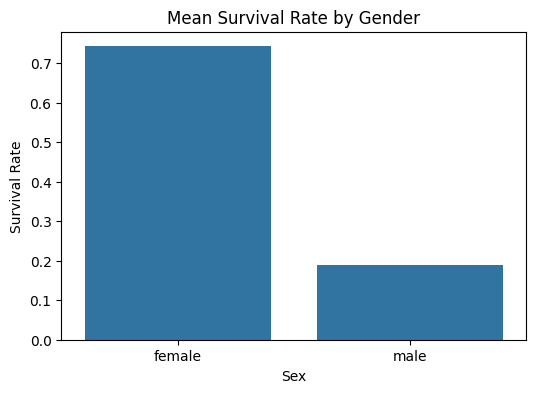

In [19]:
#4
import matplotlib.pyplot as plt
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.show()

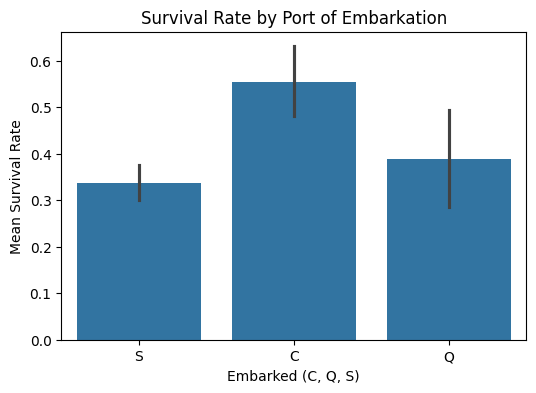

In [20]:

df2 = pd.read_csv('/content/drive/MyDrive/AI/Titanic-Dataset.csv')
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df2)
plt.title("Survival Rate by Port of Embarkation")
plt.xlabel("Embarked (C, Q, S)")
plt.ylabel("Mean Survival Rate")
plt.show()
